In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import exists
#
if not exists(".isparent"):
    %cd -q ../
! echo "current working dir:" $(pwd)

current working dir: /home/giulio/PhD/projects/ising-model


In [2]:
pthconfig = "res/config/.config_acf_compute"
df = pd.read_csv(pthconfig)

In [7]:
df

,tMC,N_M,_m_sav,Navg,L1,L2,Ls,b_m,b_M,b_s,_m_init,_m_upd,_m_mea
0,1,10000,0,10,10,10,10,0.01,0.44,0.02,hs_unif,algo_metro,1


In [16]:
L1, L2 = df['L1'][0], df['L2'][0];
N = L1 * L2
Nlst = []
while (N <= df['N_M'][0]):
    Nlst.append(N)
    L1 += df['Ls'][0]
    L2 += df['Ls'][0]
    N = L1 * L2;
betalst = np.arange(df['b_m'][0], df['b_M'][0], df['b_s'][0])

In [20]:
Nlst

[100, 400, 900, 1600, 2500, 3600, 4900, 6400, 8100, 10000]

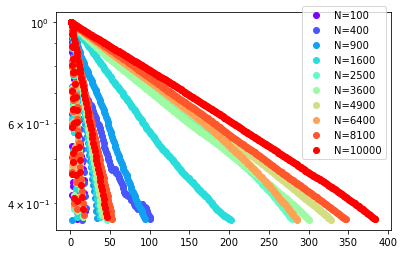

In [33]:
color = plt.cm.rainbow(np.linspace(0, 1, len(Nlst)))
for N,c in zip(Nlst, color):
    for beta in betalst:
        pth = f"res/obs/N={N:d}/bt={beta:.2g}/ACF_avg={df['Navg'][0]:d}.bin"
        acf = np.fromfile(pth, dtype=np.double)
        midx = np.argmax(acf<1/np.exp(1))
        x = np.linspace(1, midx, num=midx)
        plt.plot(x, acf[:midx], 'o', color=c, 
        label=fr"N={N:d}")
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
  if label not in newLabels:
    newLabels.append(label)
    newHandles.append(handle)
plt.legend(newHandles, newLabels, bbox_to_anchor=(1.0, 1.05))
plt.yscale("log")
# plt.xscale("log")
# plt.legend()